<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_YB1%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/ESAA/mini_project1/data')
os.getcwd()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

Mounted at /content/drive/


'/content/drive/MyDrive/ESAA/mini_project1/data'

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train=pd.read_csv('movies_train.csv')

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train 데이터의 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train 데이터의 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수(dir_prev_bfnum: float64) 에 따른 관객 수(box_off_num:int64)

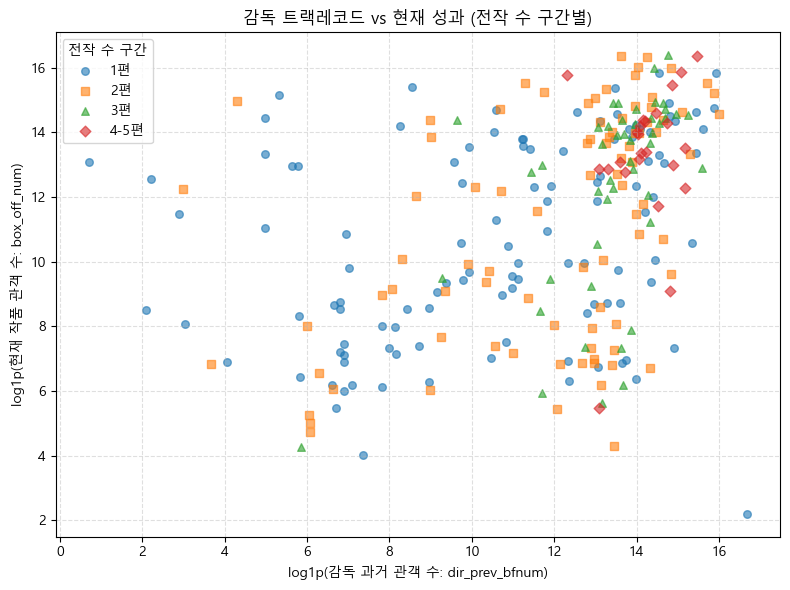

상관계수 (log_prev vs log_aud): 0.448
prev_bins
1편      113
2편       86
3편       47
4-5편     24
Name: count, dtype: int64


In [ ]:
# 감독의 과거 성과 vs 현재 흥행 (scatter)
# x: log1p(dir_prev_bfnum), y: log1p(box_off_num)
# 색/마커: dir_prev_num(전작 수) 구간

# 로그 변환 (0 처리 안전)
train["log_prev"] = np.log1p(train["dir_prev_bfnum"])
train["log_aud"]  = np.log1p(train["box_off_num"])

# 전작 수 구간화
bins   = [1, 2, 3, 4, np.inf]                 # 1편, 2편, 3편, 4-5편
labels = ["1편","2편","3편","4-5편"]    # 라벨
train["prev_bins"] = pd.cut(train["dir_prev_num"], bins=bins, labels=labels, right=False)

# ===== 산점도 =====
plt.figure(figsize=(8, 6))
markers = ["o", "s", "^", "D"]  # 구간별 마커
for i, (lab, grp) in enumerate(train.groupby("prev_bins")):
    m = markers[i % len(markers)]
    plt.scatter(grp["log_prev"], grp["log_aud"], alpha=0.6, s=30, marker=m, label=str(lab))

plt.xlabel("log1p(감독 과거 관객 수: dir_prev_bfnum)")
plt.ylabel("log1p(현재 작품 관객 수: box_off_num)")
plt.title("감독 트랙레코드 vs 현재 성과 (전작 수 구간별)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="전작 수 구간")
plt.tight_layout()
plt.show()

# ===== 간단한 수치 요약 =====
corr = train[["log_prev", "log_aud"]].corr().iloc[0,1]
print(f"상관계수 (log_prev vs log_aud): {corr:.3f}")
print(train["prev_bins"].value_counts().sort_index())

* 1→2로 갈수록 성과가 올라가고, 3편 구간에서 피크가 나타나며, 4–5편은 3편보다는 약간 낮지만 2편보다는 높다

### 5-2) 개봉 월 시즌성 × 장르

    genre  month  median_log_aud   n
0      공포      1             7.4   1
1      공포      2             7.6   2
2      공포      3            12.4   3
3      공포      4             9.4   1
4      공포      5            14.2   2
5      공포      6            12.4   4
6      공포      7            13.3   6
7      공포      8            11.6  10
8      공포      9            10.7   4
9      공포     10            13.9   5
10     공포     11            13.5   3
11     공포     12             6.3   1
12  다큐멘터리      1             8.1   6
13  다큐멘터리      2             7.9   4
14  다큐멘터리      3             9.0   6
15  다큐멘터리      4             7.8  12
16  다큐멘터리      5             8.5   9
17  다큐멘터리      6             7.2   5
18  다큐멘터리      7             8.0   7
19  다큐멘터리      8             9.3   7


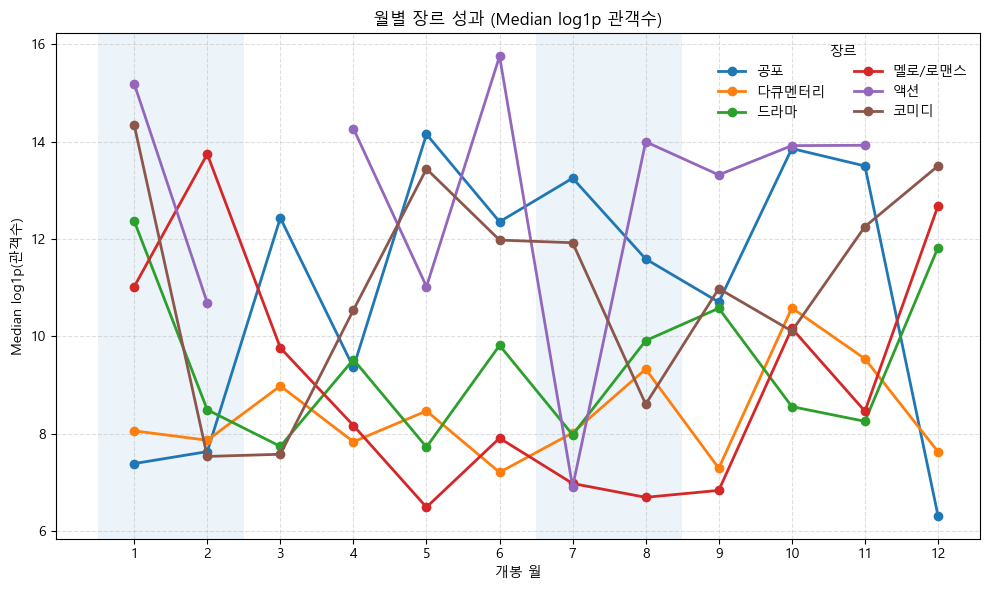

In [ ]:
# 월별 장르 성과 라인플롯: "장르는 계절을 탈까?"
# - x: 개봉 월(1~12)
# - y: 장르별 median log1p(관객수)  → 극단치 영향 완화
# - 상위 K개 장르만 시각화(혼잡도 ↓)
# - 방학/명절(1–2월, 7–8월) 배경 밴드 옵션

# -------------------------------
# 0) 전처리
# -------------------------------

# 파생: 개봉 월, 로그 관객수
train["month"]   = train["release_time"].dt.month
train["log_aud"] = np.log1p(train["box_off_num"].astype(float))

# -------------------------------
# 1) 상위 K개 장르만 선택(혼잡도 줄이기)
# -------------------------------
TOP_K = 6
top_genres = train["genre"].value_counts().head(TOP_K).index
sub = train[train["genre"].isin(top_genres)].copy()

# -------------------------------
# 2) 월×장르 집계(중앙값 + 표본수)
# -------------------------------
agg_median = (
    sub.groupby(["genre", "month"])["log_aud"]
      .median()
      .rename("median_log_aud")
      .reset_index()
)
agg_count = (
    sub.groupby(["genre", "month"])["box_off_num"]
      .size()
      .rename("n")
      .reset_index()
)
summary = pd.merge(agg_median, agg_count, on=["genre", "month"], how="left")

# 표 확인
print(summary.sort_values(["genre", "month"]).head(20))

# -------------------------------
# 3) 라인플롯
# -------------------------------
plt.figure(figsize=(10, 6))
months = list(range(1, 13))

for gname, grp in summary.groupby("genre"):
    # 월 1~12 전체를 보이도록 재색인
    y = pd.Series(index=months, dtype=float)
    y.loc[grp["month"].values] = grp["median_log_aud"].values
    plt.plot(months, y.values, marker="o", linewidth=2, label=str(gname))

# 축/격자/범례
plt.xticks(months)
plt.xlabel("개봉 월")
plt.ylabel("Median log1p(관객수)")
plt.title("월별 장르 성과 (Median log1p 관객수)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="장르", ncol=2, frameon=False)

# -------------------------------
# 4) 방학·명절 배경 밴드 강조
# -------------------------------
ax = plt.gca()
# 겨울방학+설 근접: 1~2월
ax.axvspan(0.5, 2.5, alpha=0.08)
# 여름방학: 7~8월
ax.axvspan(6.5, 8.5, alpha=0.08)

plt.tight_layout()


** 이번 데이터 기준으로 전반적 시즌성은 연초(1월)와 가을(10월)이 강세다. 장르별로는 드라마·코미디가 1월에 뚜렷한 피크, 다큐멘터리는 10월에 강세가 관찰된다. 멜로는 2월 잠정 강세가 보이지만 표본이 적어 확인이 필요하며, 공포/느와르는 여름 전후 가능성이 있으나 표본 주의가 필요하다.

전체 시장 흐름(Top 장르 기준)
* 월별 전형적 관객수(중앙값) 상위: 1월(≈ 28만) ≫ 10월(≈ 5.0만) > 8–9월(≈ 2.1만) > 12월(≈ 2.2만)

* 하위: 2–5월(≈ 3.8천~8천), 7월(≈ 7.7천)

  → 연초(1월)·가을(10월) 창구가 전반적으로 유리.

###5-3)해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 수에 따른 관객 수


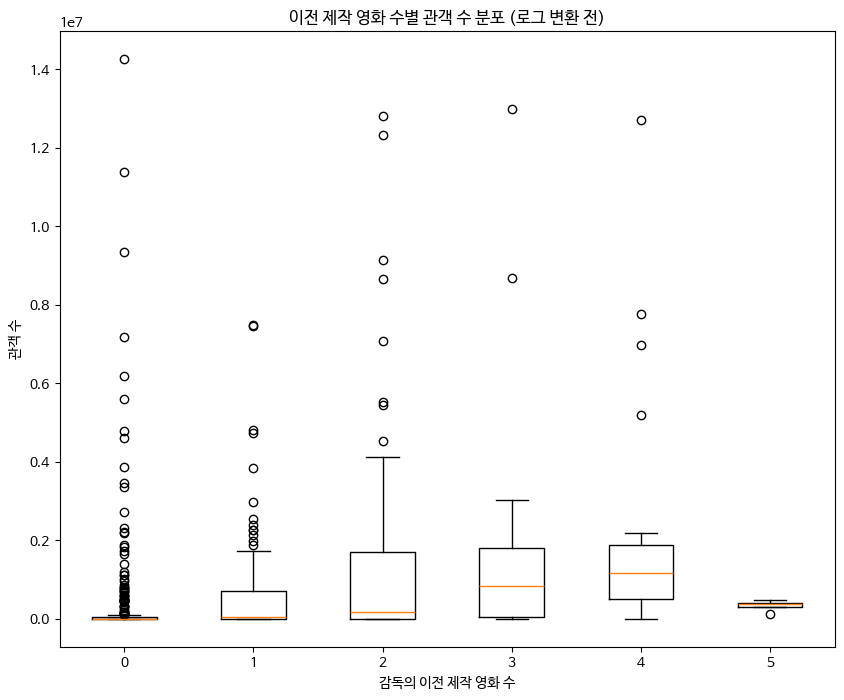

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(
    [train.loc[train["dir_prev_num"] == i, "box_off_num"] for i in sorted(train["dir_prev_num"].unique())],
    labels = sorted(train["dir_prev_num"].unique())
)

plt.title("이전 제작 영화 수별 관객 수 분포 (로그 변환 전)", fontsize=12)
plt.xlabel("감독의 이전 제작 영화 수")
plt.ylabel("관객 수")
plt.show()

boxplot에서 이상치가 많고 데이터의 분포가 한쪽으로 치우쳐 있다. 따라서 극단값의 영향을 완화시키고 분포 안정화를 위해 box_off_num에 로그변환을 수행하였다.

**boxplot**

시용 변수: dir_prev_num, box_off_num

x축: dir_prev_num

y축: log_box_off_num

- box_off_num 변수 로그변환

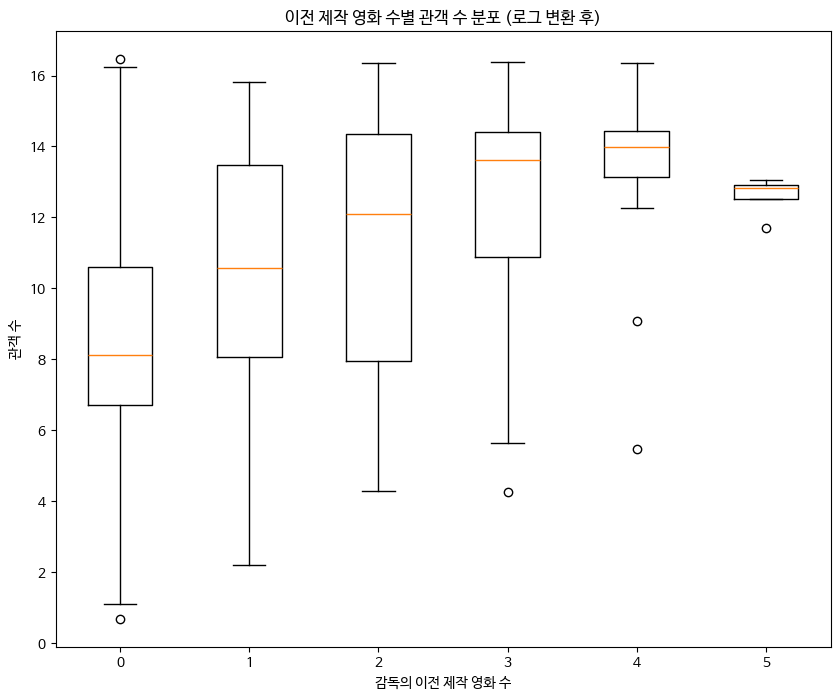

In [ ]:
train["log_box_off_num"] = np.log1p(train["box_off_num"])

plt.figure(figsize=(10,8))
plt.boxplot(
    [train.loc[train["dir_prev_num"] == i, "log_box_off_num"] for i in sorted(train["dir_prev_num"].unique())],
    labels = sorted(train["dir_prev_num"].unique())
)

plt.title("이전 제작 영화 수별 관객 수 분포 (로그 변환 후)", fontsize=12)
plt.xlabel("감독의 이전 제작 영화 수")
plt.ylabel("관객 수")
plt.show()

중앙값을 보면 감독의 이전 제작 영화 수가 많을수록 관객 수가 증가하는 경향이 있다.

-> 감독 경험이 많을수록 안정적인 흥행을 기대할 수 있음을 시사

그러나 boxplot의 수염과 이상치를 보면, 경험이 적은 감독도 일부 영화에서 높은 관객 수를 기록한 경우가 있다.

따라서 전반적으로 중앙값 기준으로는 증가 경향이 뚜렷하지만, 분포가 넓어 개별 사례의 변동성은 크다.

###5-4) 개봉 연도별 전체 관객 수 추이

**barplot + lineplot**

연도별 총 관객 수를 나타내는 barplot + 연도별 평균 관객 수를 나타내는 lineplot


---


**barplot**

사용 변수: release_time, box_off_num

x축: release_year

y축: yearly_sum

- release_time에서 year추출하여 x축으로 지정
- release_year별로 관객 수의 합을 y축으로 지정
- 개봉 연도별 관객 수 합을 barplot으로 시각화

**lineplot**

사용 변수: release_time, box_off_num

x축: release_year

y축: yearly_mean

- release_time에서 year추출하여 x축으로 지정
- release_year별로 관객 수의 평균을 y축으로 지정
- 개봉 연도별 관객 수의 평균을 lineplot으로 시각화

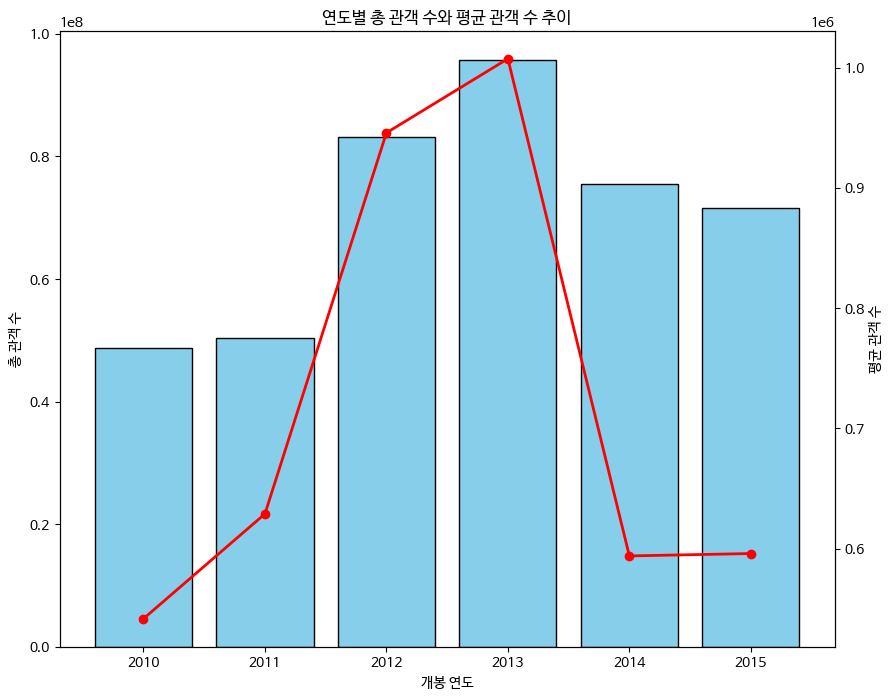

In [ ]:
train['release_year']=train['release_time'].dt.year

yearly_sum = train.groupby("release_year")["box_off_num"].sum()
yearly_mean = train.groupby("release_year")["box_off_num"].mean()

fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(yearly_sum.index, yearly_sum.values, color='skyblue', edgecolor='black')
ax1.set_xlabel("개봉 연도")
ax1.set_ylabel("총 관객 수")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(yearly_mean.index, yearly_mean.values, color='red', marker='o', linewidth=2)
ax2.set_ylabel("평균 관객 수")
ax2.tick_params(axis='y')

plt.title("연도별 총 관객 수와 평균 관객 수 추이", fontsize=12)
plt.xticks(rotation=45)
plt.show()

barplot을 보면 각 연도의 총 관객 수를 알 수 있다. 2013년에 총 관객 수가 가장 많았고, 다음은 2012, 2014 순으로 많았던 것을 확인할 수 있다.

lineplot을 보면 연도별 관객 수의 평균적인 수준을 보여준다. 2013년에 관객 수의 평균이 가장 높았고, 다음은 2012, 2011 순으로 높았던 것을 확인할 수 있다.

barplot과 lineplot을 함께 보면, 총합과 평균이 모두 높은 2012, 2013년에는 개봉 영화 수가 많고 흥행작도 많았을 것이라고 예측할 수 있다. 반면, 총합은 높으나 평균이 낮은 2014, 2015년의 경우에는 개봉 영화 수는 많으나 흥행력이 낮다는 것을 알 수 있다.

###5-5) 장르별로 개봉 연도에 따른 관객 수

**lineplot**

사용 변수: release_year, genre, box_off_num

x축: release_year

y축: log_box_off_num

- lineplot 겹쳐서 그리기

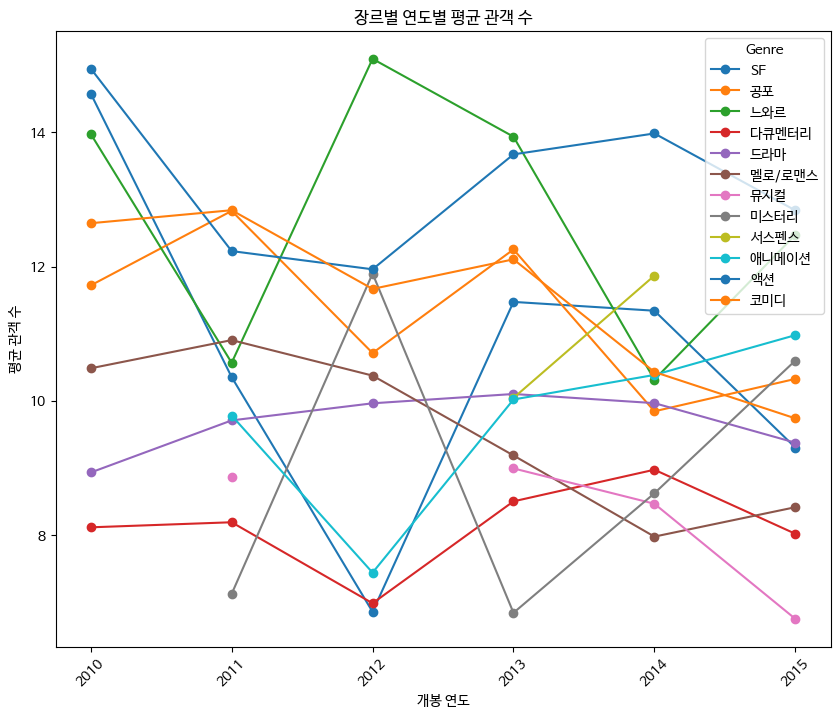

In [ ]:
genre_yearly = train.groupby(['genre', 'release_year'])['log_box_off_num'].mean().reset_index()

pivot_df = genre_yearly.pivot(index='release_year', columns='genre', values='log_box_off_num')

plt.figure(figsize=(10,8))
ax = plt.gca()

pivot_df.plot(ax=ax, marker='o')

ax.set_title("장르별 연도별 평균 관객 수", fontsize=12)
ax.set_xlabel("개봉 연도")
ax.set_ylabel("평균 관객 수")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

lineplot을 보면 SF와 느와르 장르는 변동이 큰 반면, 다큐멘터리와 드라마 장르는 안정적이다.

액션과 느와르 장르는 평균 관객 수가 높으나 다큐멘터리는 평균 관객 수가 낮다.

2012년에 느와르와 미스터리 장르의 평균 관객 수가 크게 증가한 것으로 보아 해당 장르의 흥행작이 있었을 것으로 예측할 수 있다.

**lineplot**

사용 변수: release_year, genre, box_off_num

x축: release_year

y축: log_box_off_num

- lineplot 따로 그리기

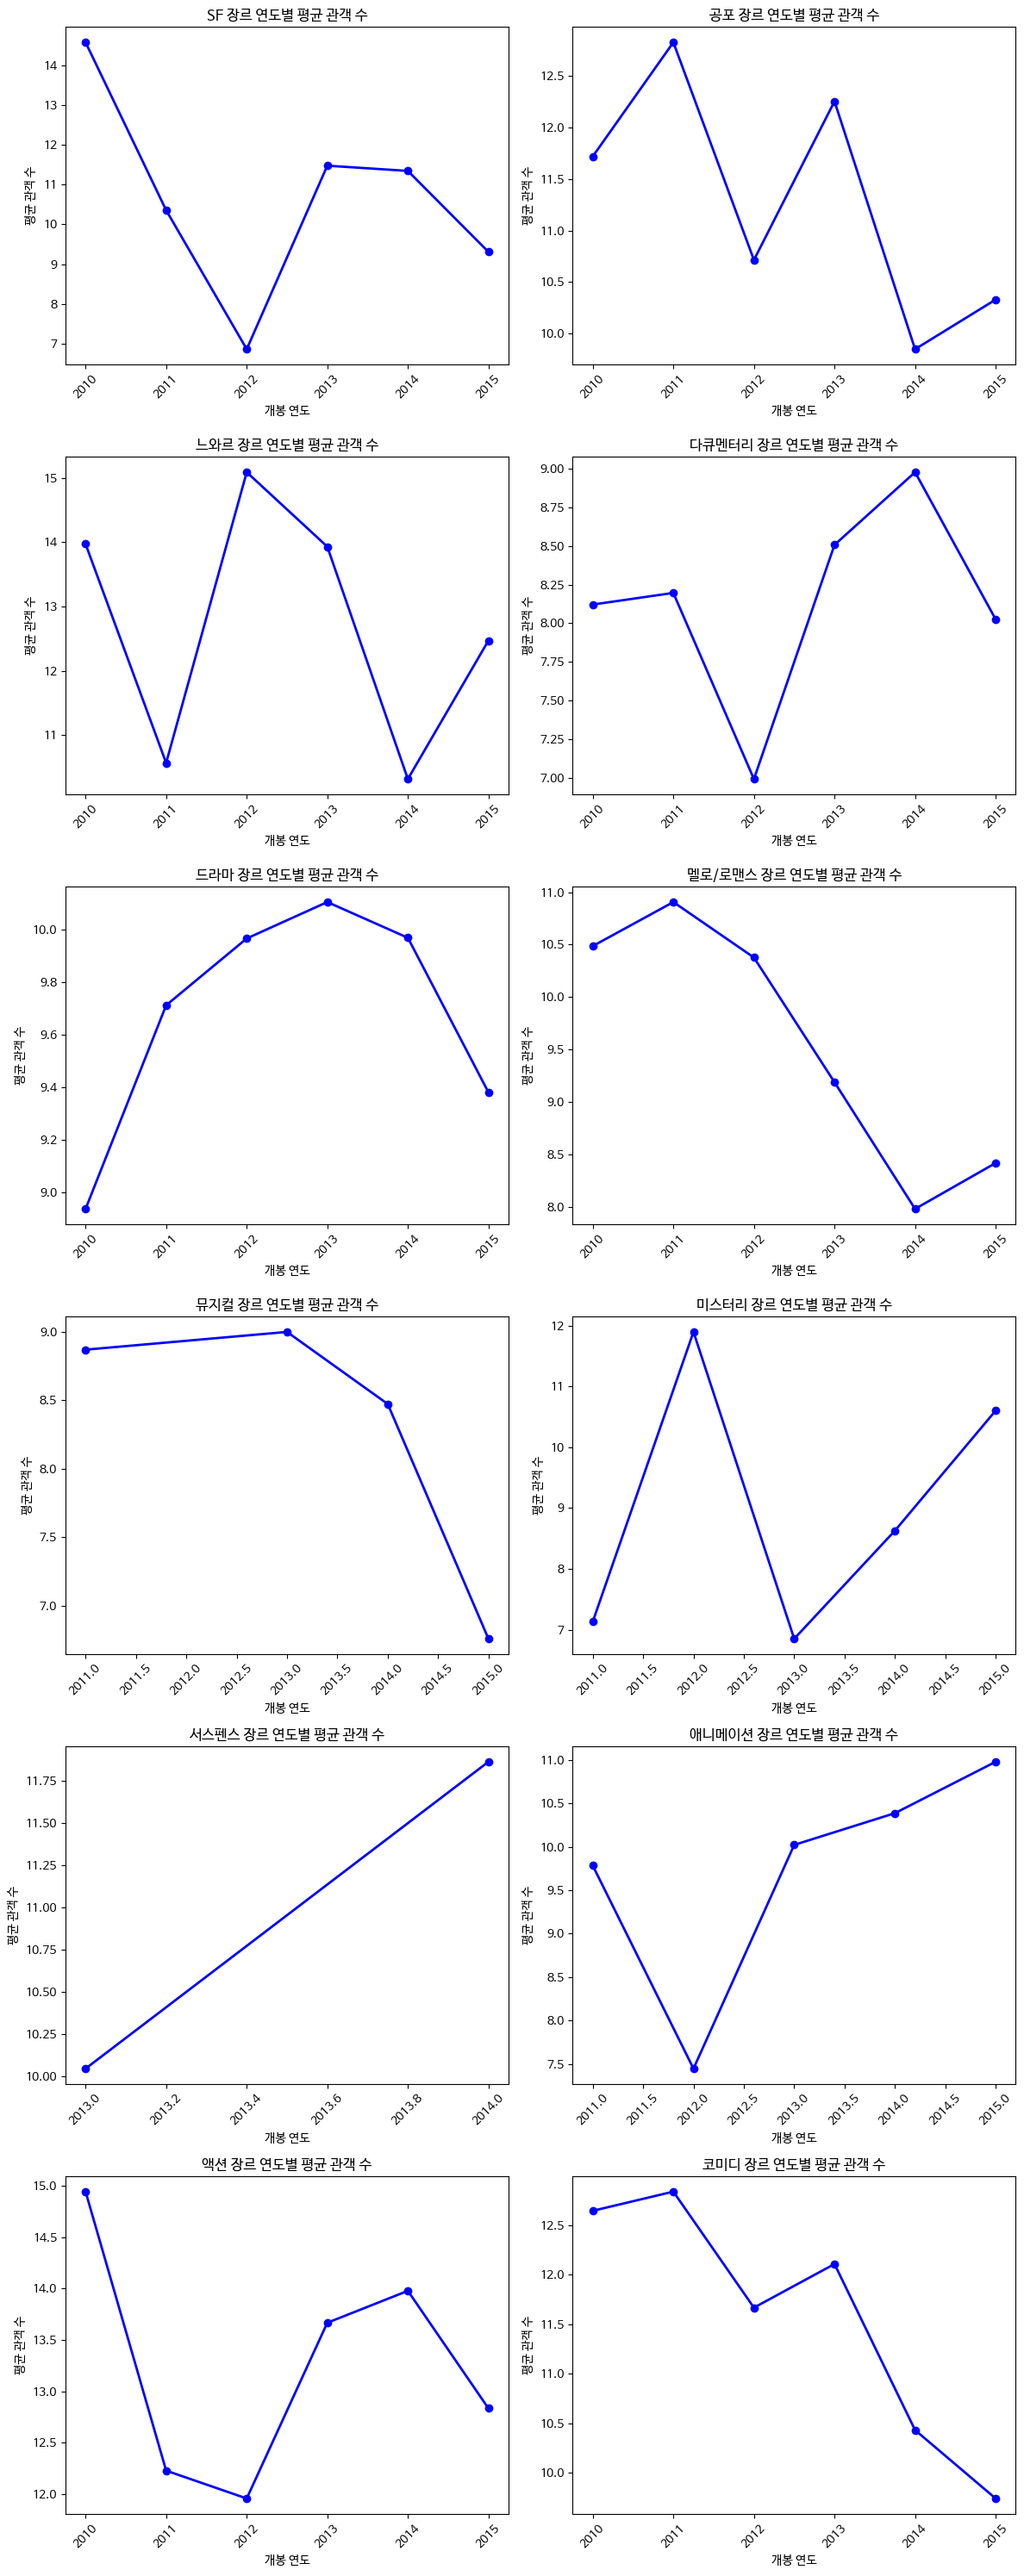

In [ ]:
genre_yearly = train.groupby(['genre', 'release_year'])['log_box_off_num'].mean().reset_index()

n = len(genre_yearly['genre'].unique())
cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12,5*rows))
axes = axes.flatten()

for i,g in enumerate(genre_yearly['genre'].unique()):
    data = genre_yearly[genre_yearly['genre'] == g]
    axes[i].plot(data['release_year'], data['log_box_off_num'], marker='o', color='blue', linewidth=2)
    axes[i].set_title(f"{g} 장르 연도별 평균 관객 수", fontsize=12)
    axes[i].set_xlabel("개봉 연도")
    axes[i].set_ylabel("평균 관객 수")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

각 장르의 연도별 평균 관객 수의 변화를 더 자세히 보기 위해 장르별로 각각 lineplot으로 나타내었다.

유지컬, 멜로/로맨스, 코미디 장르는 평균 관객 수가 감소하는 것을 볼 수 있는 반면 애니메이션 장르는 평균 관객 수가 증가하는 것을 확인할 수 있다.

###5-6) 장르별 평균 관객수 barplot
어느 장르가 평균적인 관객수가 많은가?


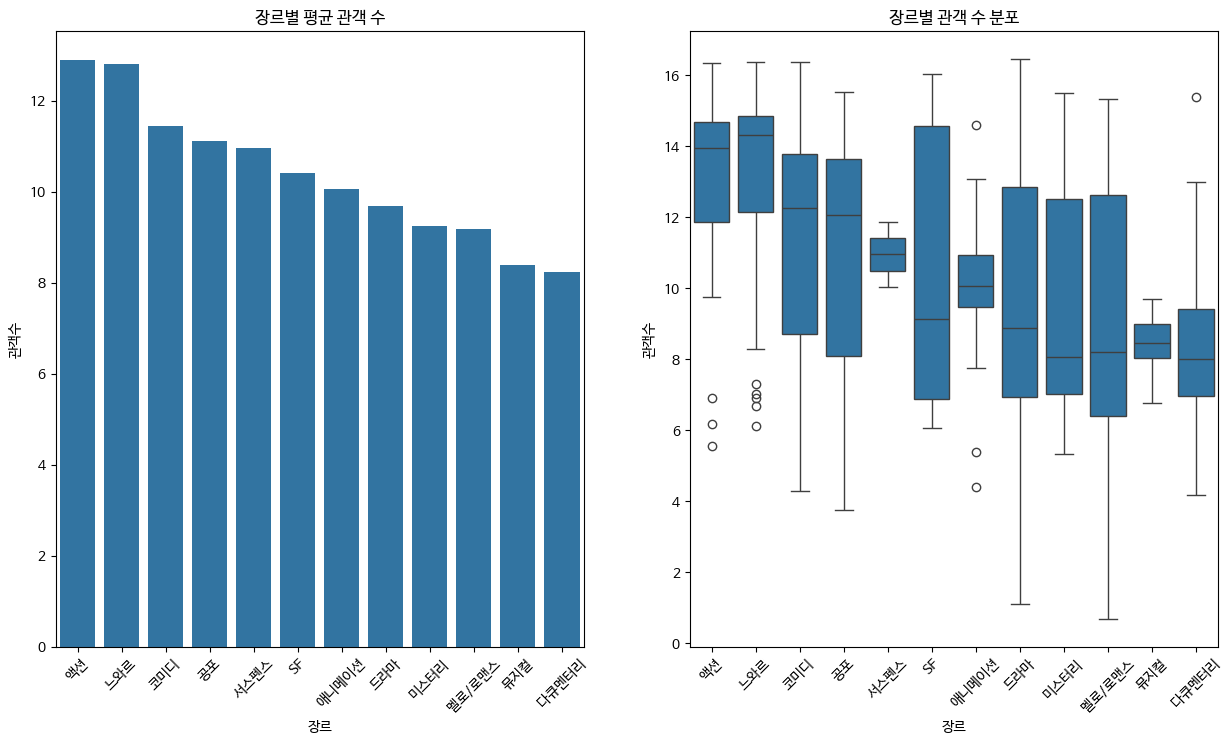

In [ ]:
df['log_box_off_num'] = np.log1p(df['box_off_num'])
df_grouped=df.groupby('genre')['log_box_off_num'].mean()
df_grouped=df_grouped.sort_values(ascending=False)
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
# barplot
sns.barplot(x=df_grouped.index, y=df_grouped.values, ax=ax[0])
ax[0].set_xlabel('장르')
ax[0].set_ylabel('관객수')
ax[0].set_title('장르별 평균 관객 수')
ax[0].set_xticklabels(df_grouped.index,rotation=45)


# boxplot
sns.boxplot(x='genre', y='log_box_off_num', data=df, order=df_grouped.index, ax=ax[1])
ax[1].set_xlabel('장르')
ax[1].set_ylabel('관객수')
ax[1].set_title('장르별 관객 수 분포')
ax[1].set_xticklabels(df_grouped.index,rotation=45)


plt.show()

느와르, 액션, sf, 코미디, 드라마 순으로 장르별 평균 관객수가 많다.
중앙값은 느와르, 액션, 코미디, 공포, 서스펜스 순서로 관객수가 많다.

5-7) 배급사 별 평균 관객 수 barplot: 흥행 독점 top10 배급사 확인

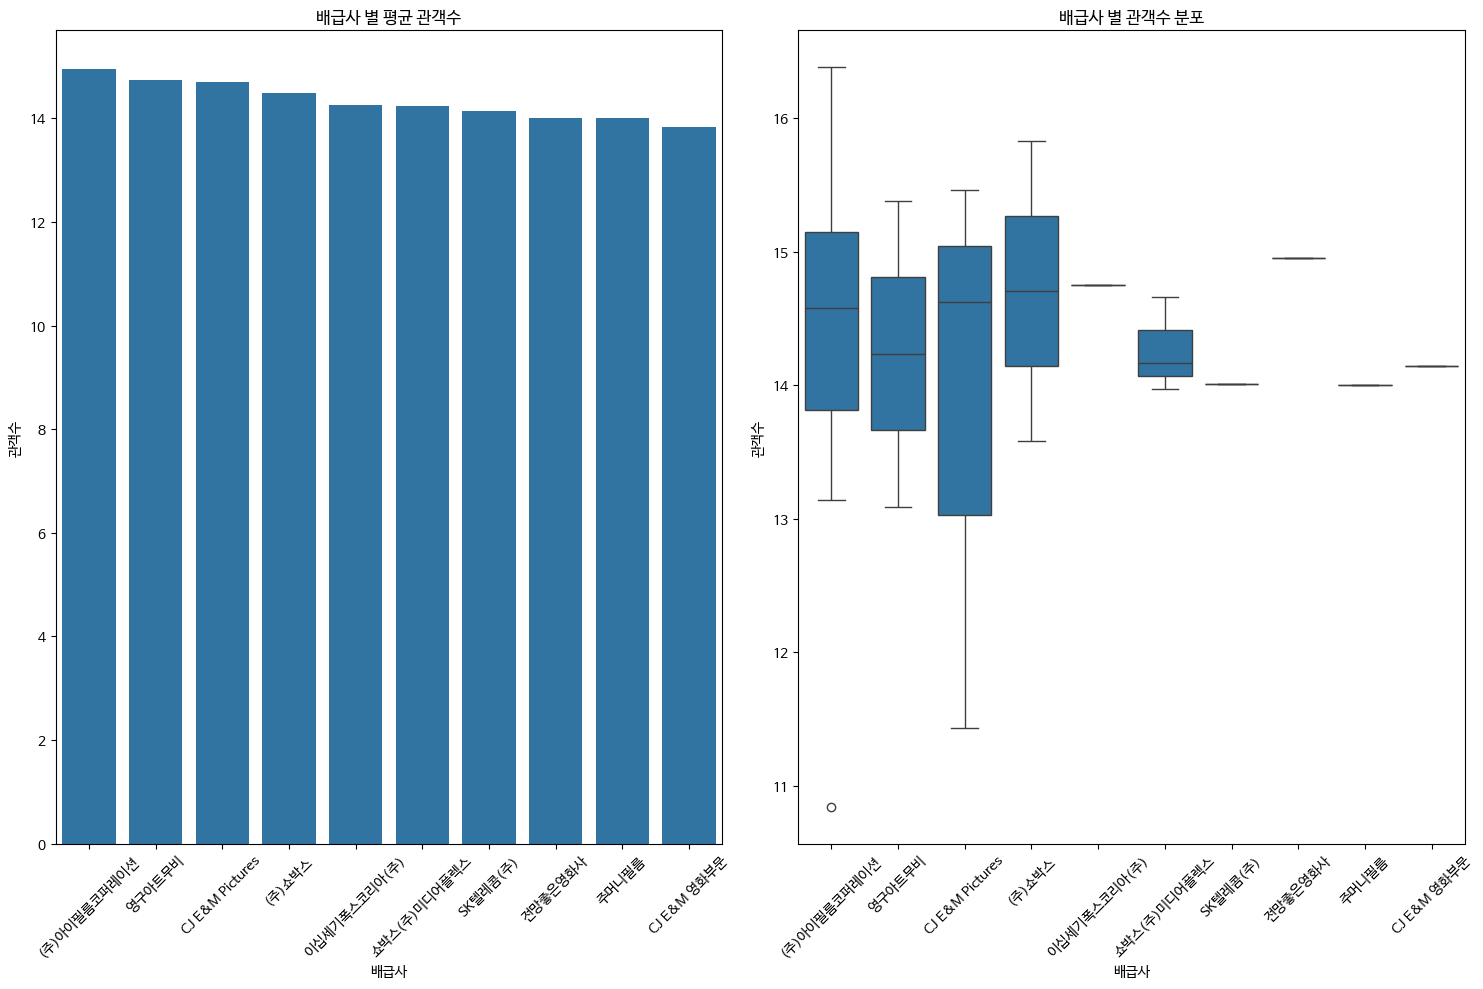

In [ ]:
df_9 = df.groupby('distributor')['log_box_off_num'].mean()
df_9 = df_9.sort_values(ascending=False).iloc[:10]

fig, axes = plt.subplots(1, 2, figsize=(15,10))

# 왼쪽: 상위 10개 배급사 평균 관객 수 barplot
sns.barplot(x=df_9.index, y=df_9.values, ax=axes[0])
axes[0].set_title('배급사 별 평균 관객수')
axes[0].set_xlabel('배급사')
axes[0].set_ylabel('관객수')
axes[0].set_xticklabels(df_9.index, rotation=45)
axes[0].tick_params(axis='y', labelsize=10)

# 오른쪽: boxplot (분포 확인용)
sns.boxplot(x='distributor', y='log_box_off_num', data=df[df['distributor'].isin(df_9.index)], ax=axes[1])
axes[1].set_title('배급사 별 관객수 분포')
axes[1].set_xlabel('배급사')
axes[1].set_ylabel('관객수')
axes[1].set_xticklabels(df_9.index, rotation=45)

plt.tight_layout()
plt.show()

CJ E&M PICTURES, (주)쇼박스, (주)아이필름코퍼레이션,쇼박스(주)미디어플렉스,영구아트무비순으로 높은 평균 관객수를 보인다.

오른쪽 박스플롯을 보았을때 중앙값을 기준으로 보면 순위가 달라지는 것을 알 수 있다.

###5-8) 영화 길이와 관객수의 관계 산점도: 상관관계 확인

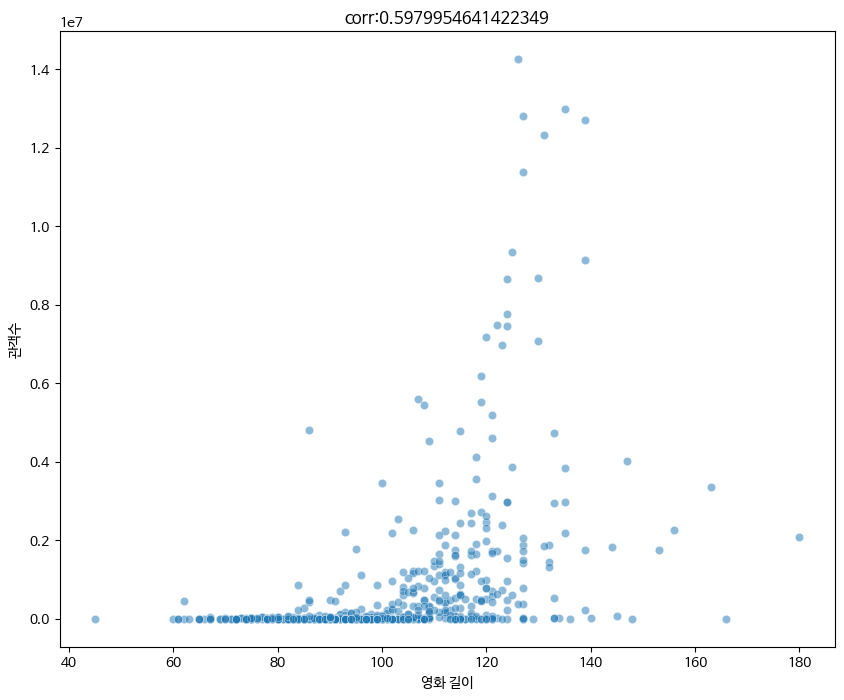

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='time', y='box_off_num', data=df, alpha=0.5)
corr_num=df[['time', 'log_box_off_num']].corr().iloc[0,1]
plt.xlabel('영화 길이')
plt.ylabel('관객수')
plt.title('corr:'+ str(corr_num))
plt.show()

양의 상관관계를 보이며 영화길이가 길어질수록 관객수가 많아지다가 140분 이상의 구간에서는 감소하는 추세를 확인할 수 있다.

###5-9) 스텝수(num_staff: int64)에 따른 관객 수(box_off_num:int64)

영화 제작 시 인력이 많이 투입될수록 더 많은 관객 수가 산출되는지 알아보기 위해 분석을 실행한다.

영화 제작에 투입되는 인력의 규모와 관객 수 사이의 관계를 분석하는 것은 매우 중요하다. 투입되는 인력이 많을수록 더 많은 관객이 영화를 관람하는지, 즉, 투입과 산출이 비례 관계에 있는지를 파악하기 위함이다.

만약 인력 투입이 관객 수 증가에 직접적으로 비례하지 않는다면, 이는 무작정 많은 인력을 투입하는 것이 비효율적임을 의미한다. 따라서 본 분석을 통해 흥행을 극대화하면서도 효율적인 인력 규모가 어느 정도인지 파악하는 것이 가능하다. 이는 영화 제작사가 제작 비용을 최적화하는 데 중요한 지표가 될 것이다.

####(a) 스캐터 플롯

In [ ]:
train['box_off_num'] = np.log1p(train['box_off_num'])

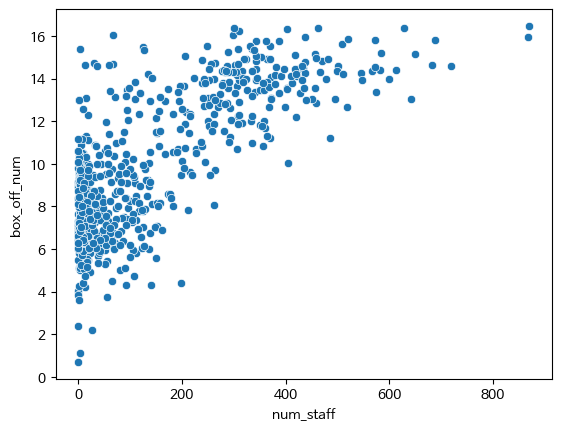

In [ ]:
sns.scatterplot(x='num_staff',y='box_off_num',data=train)
plt.show()

이 그래프에 따르면, 제작 인력 규모가 500명 이하인 영화들이 대다수임이 확인된다.

그럼에도 불구하고, 500명 이상의 인력이 투입된 영화 중에도 높은 관객 수를 기록한 작품들이 상당수 있다. 따라서, 인력 규모에 따라 흥행 성과에 어떤 차이가 있는지 심층적으로 분석하기 위해, 투입된 인력의 수를 일정한 구간으로 나누어 바이올린 플롯으로 시각화할 필요가 있다.

####(b) 바이올린 플롯

In [ ]:
train['num_staff'].max()

869

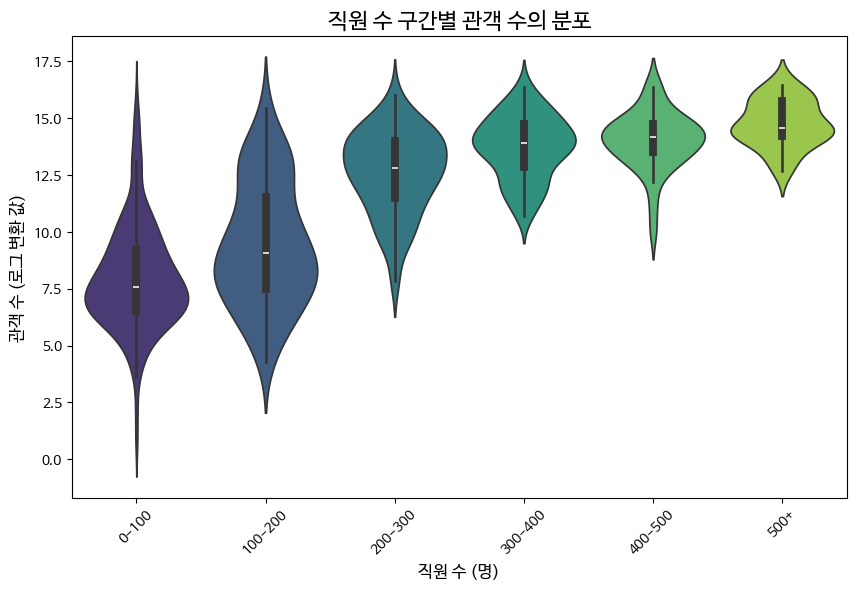

In [ ]:
# num_staff 구간 정의
bins = [0, 100, 200, 300, 400, 500, 900]

# 각 구간의 라벨 정의
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']


# num_staff 열을 구간으로 나누어 새로운 열('staff_bin') 생성
# right=False: 구간을 왼쪽 경계는 포함하고 오른쪽 경계는 포함하지 않도록 함
# include_lowest=True: 가장 낮은 값(최소값)이 첫 번째 구간에 포함되도록 함
train['staff_bin'] = pd.cut(train['num_staff'], bins=bins, labels=labels, right=False, include_lowest=True)

# 계산된 평균을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(x='staff_bin', y='box_off_num', data=train, palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('직원 수 구간별 관객 수의 분포', fontsize=16)
plt.xlabel('직원 수 (명)', fontsize=12)
plt.ylabel('관객 수 (로그 변환 값)', fontsize=12)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전

# 그래프 표시
plt.show()

그래프를 보면, 스태프 수가 증가할수록 바이올린 플롯의 높이가 증가하고, 폭도 넓어지는 경향이 있다. 스태프 수가 많을수록 관객 수의 평균이 높아지지만, 편차도 커지기 때문에 흥행 성적의 양극화가 심해진다고 볼 수 있다.

* 0-100명: 폭이 가장 좁고 중앙값이 가장 낮다. 하단부 꼬리가 Y축 0 근처까지 내려와 있다. 이는 직원 수가 적은 영화는 대부분 관객 수도 적다는 것을 보여준다. 데이터가 아래쪽에 밀집되어 있어, 관객 수 편차가 가장 작다.

* 100-200명: 중앙값이 이전 구간보다 약간 높아졌지만 폭이 더 넓어졌다. 아래쪽으로 꼬리가 길게 내려와 있는 것을 보면 여전히 관객 수가 적은 영화가 많다는 것을 알 수 있다. 흥행 평균 성적은 올랐으나, 낮은 흥행 성적을 기록한 영화가 많아 분포가 비대칭적이다.

* 200-300명: 중앙값이 또 상승했으며, 폭은 더 넓어지고 모양도 더 고르게 퍼져있다. 적은 관객 수에 쏠려 있던 현상이 완화된 것을 볼 수 있다. 이를 통해 중간 규모의 직원 수를 가진 영화들이 다양한 박스오피스 수익을 기록하며 흥행 성공 가능성이 더 넓게 분산되어 있음을 알 수 있다.

* 300-400명: 중앙값이 가장 높은 구간 중 하나이며, 폭이 매우 넓다. 특히 중앙값뿐만 아니라, 상단부(고수익)과 하단부(저수익)의 폭도 다른 구간에 비해 두껍게 유지되는 경향을 보인다. 직원 수가 많아질수록  평균적인 흥행 성적이 높은 수준을 보이지만, 분산도 커서 흥행의 양극화가 가장 심하다.

* 400-500명: 중앙값은 여전히 높지만, 폭이 다시 약간 좁아지는 경향을 보인다. 흥행 평균은 높게 유지되나, 극단적인 대성공을 거두는 영화의 비율이 300-400명 구간보다 약간 줄었음을 알 수 있다.

* 500명 이상: 중앙값은 높고, 폭이 좁은 편은 아니지만, Y축 상단(높은 수익)에 쏠려 중앙값이 가장 높은 구간 중 하나이다. 하단부의 꼬리가 짧으므로 직원 수가 매우 많은 영화는 극도로 낮은 관객 수를 산출할 위험이 적고, 높은 관객 수를 기록하는 경향을 가진다고 볼 수 있다.



###5-10) 배급사(distributor: object)와 장르(genre: object)의 상관관계
: 서브플롯 & 바플롯

영화 제작시에 각 영화 장르에 따라 어떤 배급사를 선택하는 것이 유리한지 알아보기 위해 분석을 실시한다.

영화 제작 시 각 장르에 맞는 배급사를 선택하는 것은 흥행에 매우 중요하다. 특정 장르에 대한 경험이 풍부한 배급사는 해당 장르의 관객을 잘 이해하고 있어, 효과적인 마케팅 전략을 수립하고 영화를 성공적으로 배급할 가능성이 높기 때문이다.

영화 제작사는 이 분석을 통해 제작하는 영화의 장르에 따라 가장 적합한 배급 파트너를 찾을 수 있다.

마찬가지로, 배급사 측에서도 자신들의 주요 배급 장르에 부합하는 영화를 제작하는 제작사에게 먼저 배급을 제안할 수 있어, 서로에게 긍정적인 시너지를 창출할 수 있다.

In [ ]:
#unique(): 데이터프레임의 특정 열에서 중복되지 않는 유일한 값들만 추출
distributors = train['distributor'].unique()
n_distributors = len(distributors)
print(n_distributors)

top10_distributors = train['distributor'].value_counts().head(10).index
print(top10_distributors)


169
Index(['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', '인디스토리',
       '골든타이드픽처스', '(주) 케이알씨지', '시너지', '(주)키노아이'],
      dtype='object', name='distributor')


10개의 주요배급사들의 배급 현황을 파악할 것이다.

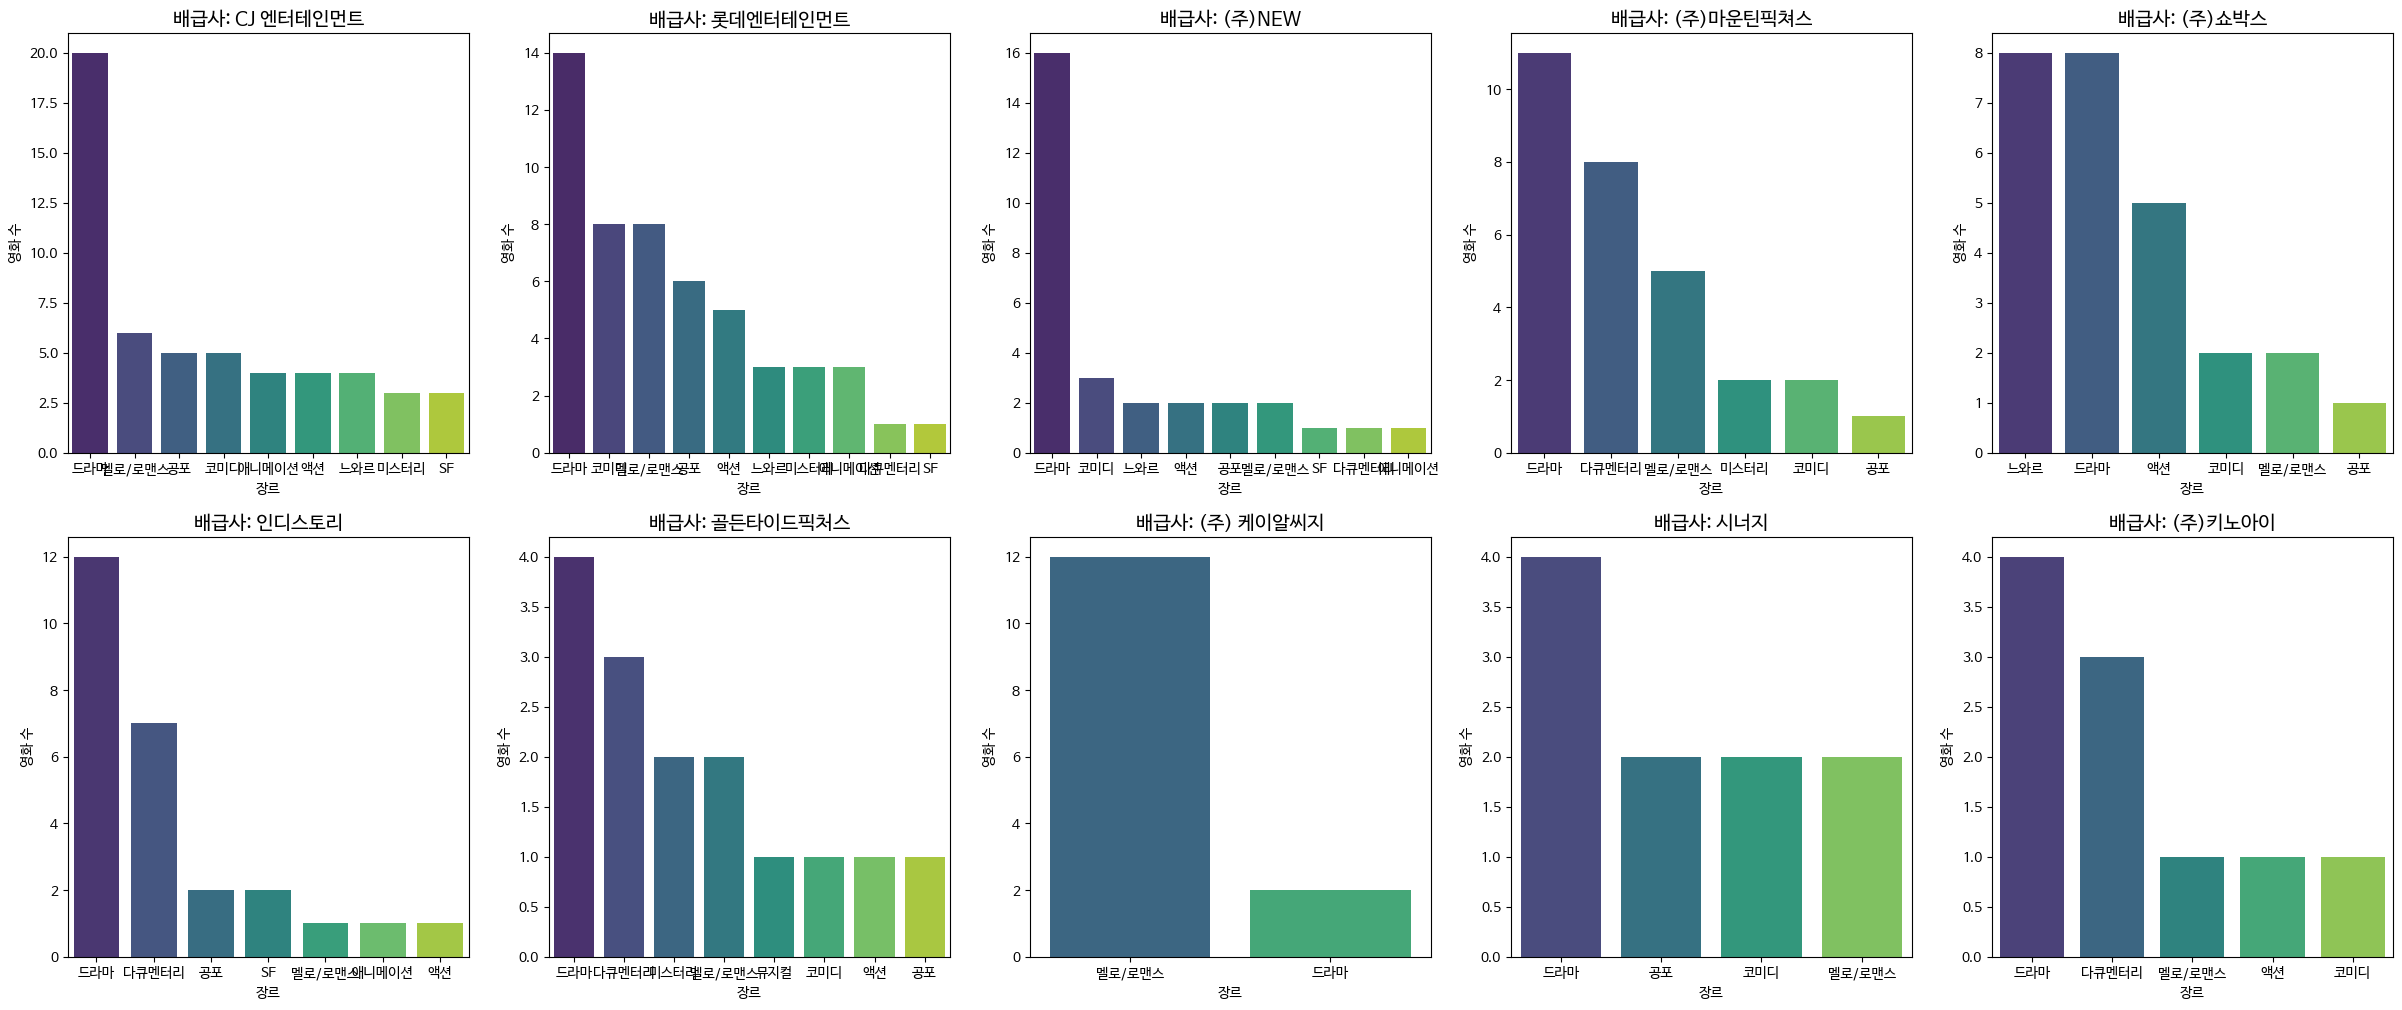

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(30, 12))

#다차원 배열을 1차원 배열로 만들어줌: [[ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10]] => [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
axes = axes.flatten()

#enumerate(): top10_distributors 목록의 요소들을 인덱스와 함께 순회하게 해주는 파이썬 내장 함수
for i, dist in enumerate(top10_distributors):

    # 해당 배급사의 데이터만 필터링
    dist_data = train[train['distributor'] == dist]

    # 장르별 빈도수 계산
    genre_counts = dist_data['genre'].value_counts()

    # 막대 그래프 그리기 (ax=axes[i]: 그래프를 그릴 서브플롯의 위치를 지정함)
    sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[i],palette='viridis')

    # 그래프 제목 및 라벨 설정
    axes[i].set_title('배급사: {}'.format(dist), fontsize=14)
    axes[i].set_xlabel('장르')
    axes[i].set_ylabel('영화 수')

# 전체 그래프 레이아웃 조절
plt.show()

* CJ 엔터테이먼트, 롯데엔터테이먼트,(주)NEW, 마운틴픽쳐스, 인디스토리, 골든타이드픽쳐스, 시너지,(주)키노아이의 그래프에서 드라마 장르의 영화 수가 가장 많게 나타난다. 이는 드라마 장르가 가장 보편적이고, 이들 배급사의 핵심 장르임을 보여준다.

* 특이하게 (주)쇼박스는 전체 배급 영화 중 느와르 영화가 상당 수를 차지한다.

* CJ 엔터테이먼트, 롯데엔터테이먼트,(주)NEW는 다양한 장르의 영화를 배급하고 있다.